<h4><b>1. Imports and Setup</b></h4>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

%matplotlib inline

<h4><b>2. Load dataset</b></h4>

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
id_to_lbl = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
lbl_to_id = {lbl: id_ for id_, lbl in id_to_lbl.items()}

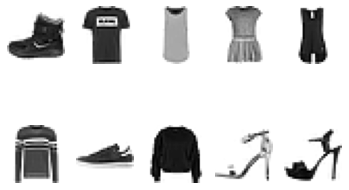

In [12]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap="binary")
    plt.axis("off")

<h4><b>3. Prepare Dataset</b></h4>

In [13]:
x_valid, y_valid = x_train[50_000:], y_train[50_000:]
x_train, y_train = x_train[:50_000], y_train[:50_000]

# scaling 
x_train = x_train / 255.0
x_test  = x_test  / 255.0
x_valid = x_valid / 255.0